<a href="https://colab.research.google.com/github/madeline-evenson/Northwestern-CIERA-Python-Intro/blob/main/Section_1_Intro_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1. Intro to Pandas

We have used Python lists and Numpy arrays to store and manipulate data.
Each method has its place in a Python program.
But there's an excellent Python package called Pandas that greatly facilitates handling data and more importantly, managing data from files.
Pandas uses the DataFrame, which can be thought of as a large table with built-in functions to:
- process rows and columns
- read and write to many different formats on disk
- interact with other DataFrames.

One key advantage of pandas over other types of data storage is that it can easily handle manage many different data types.

## 1.1 Getting Started

First, we need to import the package. We should also import NumPy for other useful functions and matplotlib for when we plot
```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.1.1 The DataFrame

Here, we will demonstrate how to create a DataFrame using lists.
First, let's define some familiar looking Solar System data.

```
planets = [['Mercury', 0.0553, 0.4, 0],
           ['Venus', 0.815, 0.7, 0],
           ['Earth', 1.0, 1.0, 1],
           ['Mars', 0.107, 1.5, 2],
           ['Jupiter', 317.8, 5.2, 95],
           ['Saturn', 95.2, 9.5, 146],
           ['Uranus', 14.5, 19.2, 28],
           ['Neptune', 17.1, 30.1, 16]]

colnames = ['Name','Mass','Distance','N_moons']
# Units: None, Earth Masses, AU, None
```

Take note of a few things here.

First, unlike in NumPy arrays, where you can only have one data type (usually int or float), each row in the above table mixes three different types of data: string, float, and int. This is one of the advantages of Pandas: different columns are allowed to have different data types.

Second, notice that the code above uses a second list to create names for the columns. This is a huge feature of the design philosophy of the DataFrame. While a NumPy 2D array can be thought of as a huge matrix of numbers, a DataFrame really is a table.

Finally, the code included a comment with the units associated with this data. Units were not included in the column names to keep the column names short, which helps writing the code later on be much easier. As a reminder, it is good practice to label units in your code with comments to stay organized and to be able to share your code with others so they can easily understand it.

Now, let's make a dataframe named `df` from the lists named `planets` and show it.
```
df = pd.DataFrame(planets, columns=colnames)
print(df)

```
In the second cell, try running just `df` to see how the output may look different. This distinction is only relevant when working in a Jupyter notebook and when datasets are small enough to read and look over in Python.
```
df
```

In [2]:
planets = [['Mercury', 0.0553, 0.4, 0],
           ['Venus', 0.815, 0.7, 0],
           ['Earth', 1.0, 1.0, 1],
           ['Mars', 0.107, 1.5, 2],
           ['Jupiter', 317.8, 5.2, 95],
           ['Saturn', 95.2, 9.5, 146],
           ['Uranus', 14.5, 19.2, 28],
           ['Neptune', 17.1, 30.1, 16]]

colnames = ['Name','Mass','Distance','N_moons']
# Units: None, Earth Masses, AU, None

In [3]:
df = pd.DataFrame(planets, columns=colnames)
print(df)

      Name      Mass  Distance  N_moons
0  Mercury    0.0553       0.4        0
1    Venus    0.8150       0.7        0
2    Earth    1.0000       1.0        1
3     Mars    0.1070       1.5        2
4  Jupiter  317.8000       5.2       95
5   Saturn   95.2000       9.5      146
6   Uranus   14.5000      19.2       28
7  Neptune   17.1000      30.1       16


### 1.1.2 Accessing Rows and Cells

To access individual rows, we use the method `df.loc`, where you can replace df with the name of your DataFrame.

In the previous example above, the indices ranged from 0 to 7. So, if we want to access the row for Earth, we can execute
```
df.loc[2]
```
Note that DataFrames can use different indexes. For instance, the indices may not correspond to their row number at all. In fact, you can even find tables where the indices are strings. When using `df.loc` you must remember to use the label given.

To access a specific cell, we specify both the index (as above) and the column name. For example, if we want to get the mass of Venus, we can execute
```
df.loc[2,'Mass']
```
Try this in the cell below.

In [4]:
df.loc[2, 'Mass']

np.float64(1.0)

Note that we can also use this functionality with `.loc` to
change the values of individual cells.

### 1.1.3 Accessing Columns

Accessing individual rows and cells is less useful than you may think since each row only represents one data point. When we're using tables, we're often more interested in the statistics of many data points. The DataFrame structure represents this, because it's very easy to obtain different columns. For example, if we want masses, we could use
```
df['Mass']
```
If we want multiple columns, we enter a list of column names, e.g.,
```
df[['Mass','Distance']]
```

Note that this is why it is best to keep column names short by including units in a comment rather than in the column name as mentioned above. Since we need to write out the column names, adding the units can make the code unnecessarily long.

In [5]:
df[['Mass', 'Distance']]

,Mass,Distance
0,0.0553,0.4
1,0.8150,0.7
2,1.0000,1.0
3,0.1070,1.5
4,317.8000,5.2
5,95.2000,9.5
6,14.5000,19.2
7,17.1000,30.1


### 1.1.4 df.values
When using some functions, such `plt.plot()`, we don't need a full Pandas DataFrame. Using `df.values` will extract the values and return a NumPy array.
```
df.values # returns a 2D array
df.loc[2].values # returns a 1D array of the third row
df['Mass'].values # returns a 1D array of the Mass column
```

In [6]:
df.values

array([['Mercury', 0.0553, 0.4, 0],
       ['Venus', 0.815, 0.7, 0],
       ['Earth', 1.0, 1.0, 1],
       ['Mars', 0.107, 1.5, 2],
       ['Jupiter', 317.8, 5.2, 95],
       ['Saturn', 95.2, 9.5, 146],
       ['Uranus', 14.5, 19.2, 28],
       ['Neptune', 17.1, 30.1, 16]], dtype=object)

In [7]:
df.loc[2].values

array(['Earth', np.float64(1.0), np.float64(1.0), np.int64(1)],
      dtype=object)

In [8]:
df['Mass'].values

array([5.530e-02, 8.150e-01, 1.000e+00, 1.070e-01, 3.178e+02, 9.520e+01,
       1.450e+01, 1.710e+01])

## 1.2 Making Changes to a DataFrame
### 1.2.1 Adding New Columns from Data

Suppose we obtain additional data, and we want to add it to our DataFrame. We can do so like this.
```
radii = [0.383, 0.949, 1, 0.532, 11.21, 9.45, 4.01, 3.88] # in Earth radii

df['Radius'] = radii
```

One big caveat: **your list must be ordered in the same way as your DataFrame.**

Add this new column in the next code cell.

In [9]:
radii = [0.383, 0.949, 1, 0.532, 11.21, 9.45, 4.01, 3.88] # in Earth radii

df['Radius'] = radii

print(df)

      Name      Mass  Distance  N_moons  Radius
0  Mercury    0.0553       0.4        0   0.383
1    Venus    0.8150       0.7        0   0.949
2    Earth    1.0000       1.0        1   1.000
3     Mars    0.1070       1.5        2   0.532
4  Jupiter  317.8000       5.2       95  11.210
5   Saturn   95.2000       9.5      146   9.450
6   Uranus   14.5000      19.2       28   4.010
7  Neptune   17.1000      30.1       16   3.880


### 1.2.2 Adding New Columns based on Existing Columns

Columns are essentially NumPy arrays with extra information.
As a result, we can do mathematical operations on columns just like we do with arrays.
We can leverage this to create new columns.
For example, we want to create a new column with the density of each planet. Density is the ratio of the mass of an object over its volume, and we can calculate the densities by using the formula $d = m / v$.  Our DataFrame contains planetary mass in Earth masses and radius data in Earth radius. As a result, we'll convert the masses and radii to SI units, calculate the densities using those values, and add a column named Density to the DataFrame `df`.
```
m_e = 5.9722e24 # kg
r_e = 6.371e6 # m, using the average radius
df['Density'] = m_e*df['Mass']/((4/3)*np.pi*(r_e*df['Radius'])**3)
```

What do you notice about the densities of the outer planets versus the inner planets? Compare these densities to the densities of various materials in this [wikipedia page](https://en.wikipedia.org/wiki/Density#Densities). Which materials are these densities most similar to?

What you should find is that the inner planets are rocky, so their densities are more comparable to metals, while the gas giants have densities that are closer to that of water.

In [10]:
m_e = 5.9722e24 #kg
r_e = 6.371e6 #m
df['Density'] = m_e*df['Mass'] / ((4/3)*np.pi*(r_e*df['Radius'])**3)

print(df)

      Name      Mass  Distance  N_moons  Radius      Density
0  Mercury    0.0553       0.4        0   0.383  5426.898863
1    Venus    0.8150       0.7        0   0.949  5257.531581
2    Earth    1.0000       1.0        1   1.000  5513.443376
3     Mars    0.1070       1.5        2   0.532  3918.066469
4  Jupiter  317.8000       5.2       95  11.210  1243.826982
5   Saturn   95.2000       9.5      146   9.450   621.962845
6   Uranus   14.5000      19.2       28   4.010  1239.817617
7  Neptune   17.1000      30.1       16   3.880  1614.075525


### 1.2.3 Practice Problem 1: Kepler's Law

Using Kepler's Third Law, make another column that corresponds to the orbital period for each planet **in years.** Once again, Keplers Third Law is

$$T = 2\pi \sqrt{\frac{a^3}{G(M_1 + M_2)}}$$

For the case of solar system planets, you may make the approximation that $M_1 + M_2 \approx M_\odot$.

You can calculate by hand how many seconds are in a year, but note a year technically has 365.25 days.

Use the Astronomical Quantities notebook for the other quantities you need.

In [11]:
AU = 1.496e11          # m
G = 6.67430e-11        # m^3 kg^-1 s^-2
m_sun = 2e30           # kg
seconds_per_year = 60 * 60 * 24 * 365.25


df['Orbital Period'] = (2 * np.pi * np.sqrt((df['Distance'] * AU)**3 / (G * m_sun))) / seconds_per_year

print(df)

      Name      Mass  Distance  N_moons  Radius      Density  Orbital Period
0  Mercury    0.0553       0.4        0   0.383  5426.898863        0.252258
1    Venus    0.8150       0.7        0   0.949  5257.531581        0.583986
2    Earth    1.0000       1.0        1   1.000  5513.443376        0.997138
3     Mars    0.1070       1.5        2   0.532  3918.066469        1.831860
4  Jupiter  317.8000       5.2       95  11.210  1243.826982       11.823892
5   Saturn   95.2000       9.5      146   9.450   621.962845       29.197175
6   Uranus   14.5000      19.2       28   4.010  1239.817617       83.889436
7  Neptune   17.1000      30.1       16   3.880  1614.075525      164.666470


### 1.2.4 Practice Problem 2: Equilibrium Temperature

The [equilibrium temperature](https://en.wikipedia.org/wiki/Planetary_equilibrium_temperature) of a planet is defined as the temperature at which the power supplied by its star (due to solar radiation) is equal to the power emitted by the planet (due to blackbody radiation). The formula (in units of Kelvin) is as follows:

$$ T_{\rm eq} =  \left( \frac{L (1 - A_B)}{16\sigma\pi a^2} \right)^{1/4}$$

For the solar system, we would use $L_\odot$, a is the distance between the planet and the Sun, $\sigma$ is the Stefan-Boltzmann constant, and $A_B$ is the [Bond Albedo](https://en.wikipedia.org/wiki/Bond_albedo).

Your task:
1. Create a new column for the Bond albedo of each planet, taking the data from the linked wikipedia article
2. Create a new column for the equilibrium temperature using the formula above.
3. Create a new column for the effective/surface temperature of each planet using the values listed below.
4. Create a scatter plot of the predicted equilibrium temperature versus the actual surface temperature. Show the 1-to-1 line using a dotted line for comparison. After reading the first linked wikipedia article, can you think of at least one reason why they may be different? (Hint: you've definitely learned about one of them in other science classes or the news)

```
Teff = [412.5, 737, 288, 215, 124.4, 95, 59.1, 59.3]
```
These values were taken from de Pater and Lissauer (2010).



      Name      Mass  Distance  N_moons  Radius      Density  Orbital Period  \
0  Mercury    0.0553       0.4        0   0.383  5426.898863        0.252258   
1    Venus    0.8150       0.7        0   0.949  5257.531581        0.583986   
2    Earth    1.0000       1.0        1   1.000  5513.443376        0.997138   
3     Mars    0.1070       1.5        2   0.532  3918.066469        1.831860   
4  Jupiter  317.8000       5.2       95  11.210  1243.826982       11.823892   
5   Saturn   95.2000       9.5      146   9.450   621.962845       29.197175   
6   Uranus   14.5000      19.2       28   4.010  1239.817617       83.889436   
7  Neptune   17.1000      30.1       16   3.880  1614.075525      164.666470   

   B_albedos        T_eq  T_eff  
0      0.088  430.063585  412.5  
1      0.760  232.845445  737.0  
2      0.306  254.041006  288.0  
3      0.250  211.486984  215.0  
4      0.503  102.482894  124.4  
5      0.342   81.331471   95.0  
6      0.300   58.101568   59.1  
7      

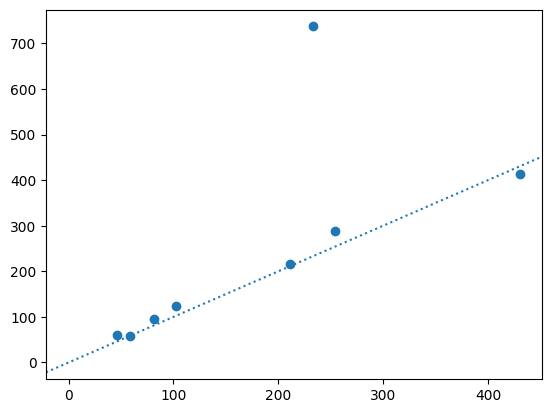

In [12]:
B_albedos = [0.088, 0.76, 0.306, 0.25, 0.503, 0.342, 0.300, 0.290]
df['B_albedos'] = B_albedos

L_sun = 3.828e26 #watts
sigma = 5.67e-8 #watts

df['T_eq'] = (L_sun * (1 - df['B_albedos']) / (16 * sigma * np.pi * (df['Distance'] * AU)**2))**.25
df['T_eff'] = [412.5, 737, 288, 215, 124.4, 95, 59.1, 59.3]

print(df)

plt.scatter(df['T_eq'], df['T_eff'])
plt.axline((0,0), slope=1, linestyle=':')

## 1.3 Intermediate Pandas

### 1.3.1 Boolean Indexing with DataFrames

When using data, we are often only interested in a subset based on certain conditions. In pandas, we can filter DataFrames using a similar method that we used for NumPy. The key difference is that we will use the column names instead of their indices. For example, suppose we are only interested in planets that have moons.

```
df[df['N_moons'] > 0]
```

As before, we can chain multiple conditionals together. For example, let's get  the planets that have moons **and** that are further than 5 au from the Sun.

```
df[(df['N_moons'] > 0) & (df['Distance'] > 5)]
```

As a reminder, here is a list of the logical operators you can use:

```
== # equal to
!= # not equal to
<= # less than or equal to
<  # less than
>= # greater than or equal to
>  # greater than

& # logical and
| # logical or
~ # logical not
```


In [13]:
df[df['N_moons'] > 0]

,Name,Mass,Distance,N_moons,Radius,Density,Orbital Period,B_albedos,T_eq,T_eff
2,Earth,1.000,1.0,1,1.000,5513.443376,0.997138,0.306,254.041006,288.0
3,Mars,0.107,1.5,2,0.532,3918.066469,1.831860,0.250,211.486984,215.0
4,Jupiter,317.800,5.2,95,11.210,1243.826982,11.823892,0.503,102.482894,124.4
5,Saturn,95.200,9.5,146,9.450,621.962845,29.197175,0.342,81.331471,95.0
6,Uranus,14.500,19.2,28,4.010,1239.817617,83.889436,0.300,58.101568,59.1
7,Neptune,17.100,30.1,16,3.880,1614.075525,164.666470,0.290,46.568827,59.3


### 1.3.2 df.iterrows()

Most times, iterating through the rows of a pandas DataFrame is not the best way to approach your problems. Most problems are best accomplished by using the columns of a DataFrame in your calculation similar to how we previously used NumPy.

If you find it necessary to iterate over the rows of a DataFrame, we can use the function `df.iterrows()` which will iterate over all the rows in the DataFrame. In the following example
```
for i, row in df.iterrows():
    print(row['Name'],'has',row['N_moons'],'moons.')
```
In this example, `df.iterrows()` returns an index, series pair for each row in the dataframe. Since each row is returned as a Pandas Series, we can use the original column names to access the columns.

Note for reference we could have performed this example in a completely vectorized way:
```
str_ser = df['Name']+' has '+ df['N_moons'].astype(str) + ' moons.'
print('\n'.join(str_ser))
```
In the above example, I make a new Series by adding the different strings together. Notice the use of the `Series.astype(str)` function to turn the integers into strings. Then, I use the join function to turn the Series of strings into one long string, where the original strings are separated by a return character. Thus, we have reproduced the output of the previous for loop.

In [14]:
for i, row in df.iterrows():
    print(row['Name'], 'has', row['N_moons'], 'moons.')

Mercury has 0 moons.
Venus has 0 moons.
Earth has 1 moons.
Mars has 2 moons.
Jupiter has 95 moons.
Saturn has 146 moons.
Uranus has 28 moons.
Neptune has 16 moons.


### 1.3.3 Using Other People's Data

You will likely never create your own DataFrame from scratch, instead almost all data you analyze will either be data you get from somewhere else.

A common format for data is called a CSV file for comma separated values. In a CSV file, each row contains the same amount of numbers, each separated by a comma. It's possible to use other "separators" as well. A commonly used one is whitespace, where some number of whitespaces (whether tabs or spaces) are used to separate different values in a row.

One of the main ways to read such files in Pandas is to use `pd.read_csv()`.

```
filename = 'path/to/file'
df = pd.read_csv(filename,...)
```
There are multiple optional parameters worth mentioning.

*   `sep`/`delimiter`: The separator to use. Defaults to `sep=','`. Another useful one is whitespace, which would be `sep='\s+'`.
*   `header`: Often, files will include a first row with a list of names. In this is the case, `header=0` will adopt those column names.
*   `names`: If your file doesn't contain a header (or you don't like the names provided), you can supply your own list of names. If you pass a header in the option above, this parameter will be overwritten, so remember to use either `header` or `names`.
*   `usecols`: If you don't want to read all the columns of a file (e.g. because of memory constraints) then you can pass a subset of columns to use. For example, if you wanted the first two and the fifth column only, then you'd use `usecols=[0,1,4]`.
*   `comment`: It's common for files to be prepended with some number of lines telling you what the file contains and additional details. These lines will begin with some character or combination of characters so that when the computer reads them it's easy to tell which lines to ignore. One common choice is `comment='#'`.

Another important thing to keep in mind: the real world is typically much messier than we would prefer. As a result, we don't always have all the information we want. So, it's common for real data to have a lot of missing values. `read_csv()` will take care of this by filling in the missing values with `np.nan`. Consider these two rows from the data you'll use in the practice problem:
```
324,EPIC 201427007 b,EPIC 201427007,1,1,1,Transit,2021,0.72091000,,1.500,0.134,,,,,,0,5633.00,0.94,,706.3910000
325,EPIC 201497682 b,EPIC 201497682,1,1,1,Transit,2019,2.13174000,,0.692,0.062,,,,,,0,,,0.78,253.0260000
```
Ignoring what these mean for now, notice that in the middle of both rows, there are a lot of commas in a row. These correspond to five columns where either the data doesn't exist. Also, the second row is shorter because it's missing two more values than the first row. When values are missing, they will be filled in with `np.nan`.

### 1.3.4 Practice Problem 3: Binaries

Redo the problem from the NumPy section, but this time using Pandas. This time, the file will be a csv.

Also, additional tasks:
1. Make a scatter plot of mass vs k-type
2. Histograms of binary total mass, mass ratio (smaller mass over larger mass), and the masses of all the individual stars.
3. Histogram of eccentricities.
4. Scatter plot of the total mass vs the mass ratio.
5. Anything else you may think of.

In [15]:
# Running in Google Colab? Run this cell to download the file for this problem
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/binaries.csv

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2025-06-09 19:34:35--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/binaries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17333 (17K) [text/plain]
Saving to: ‘binaries.csv’

binaries.csv        100%[===================>]  16.93K  --.-KB/s    in 0s      

2025-06-09 19:34:35 (70.6 MB/s) - ‘binaries.csv’ saved [17333/17333]



In [16]:
data_filename = 'binaries.csv'
data = pd.read_csv(data_filename)
print(data)

     Unnamed: 0  kstar_1  kstar_2    mass_1    mass_2          porb       ecc
0             0      1.0      1.0  0.881213  0.776805  6.286160e+04  0.020687
1             1      1.0      1.0  1.770394  1.343424  1.471452e+04  0.470695
2             2      1.0      0.0  0.992801  0.566902  2.505244e+04  0.824416
3             3      1.0      1.0  2.561173  1.564923  1.522502e+04  0.557290
4             4      1.0      1.0  3.527993  1.024889  8.829078e+02  0.532985
..          ...      ...      ...       ...       ...           ...       ...
195         195      1.0      0.0  2.100893  0.547297  6.208494e+02  0.876613
196         196      1.0      0.0  0.842545  0.540887  4.522517e+06  0.884062
197         197      1.0      1.0  3.465005  0.850592  7.040274e+04  0.551254
198         198      1.0      1.0  1.211416  1.100369  4.168088e+06  0.762588
199         199      1.0      1.0  3.188855  2.489995  7.336128e+04  0.533782

[200 rows x 7 columns]


Text(0, 0.5, 'K-Type')

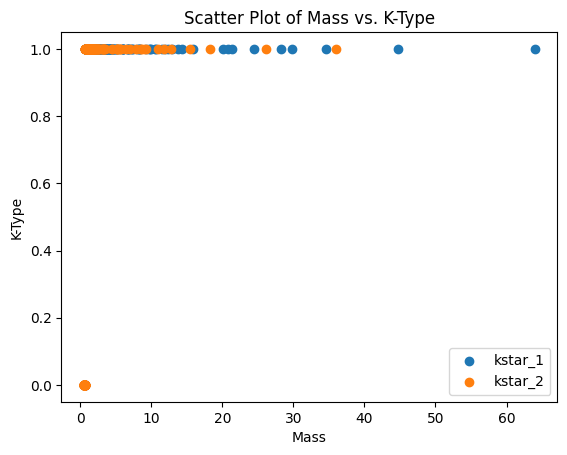

In [17]:
plt.scatter(data['mass_1'], data['kstar_1'], label='kstar_1')
plt.scatter(data['mass_2'], data['kstar_2'], label='kstar_2')
plt.legend()
plt.title('Scatter Plot of Mass vs. K-Type')
plt.xlabel('Mass')
plt.ylabel('K-Type')

Text(0, 0.5, 'Count')

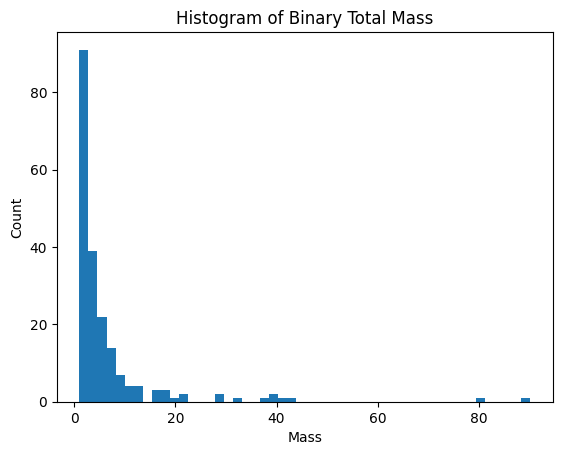

In [18]:
plt.hist(data['mass_1'] + data['mass_2'], bins=50)
plt.title('Histogram of Binary Total Mass')
plt.xlabel('Mass')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

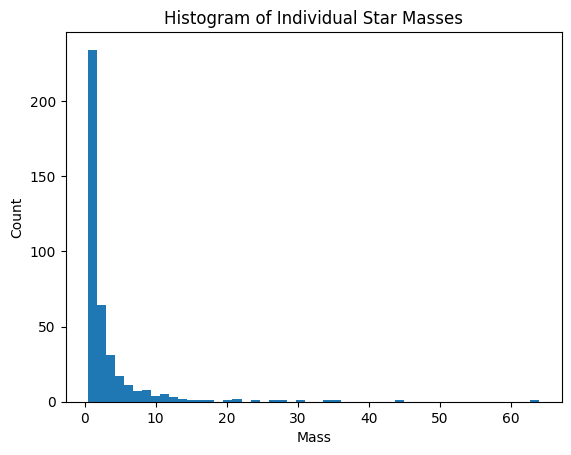

In [19]:
stars = []

for mass1, mass2 in zip(data['mass_1'], data['mass_2']):
    stars.append(mass1)
    stars.append(mass2)

plt.hist(stars, bins=50)
plt.title('Histogram of Individual Star Masses')
plt.xlabel('Mass')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

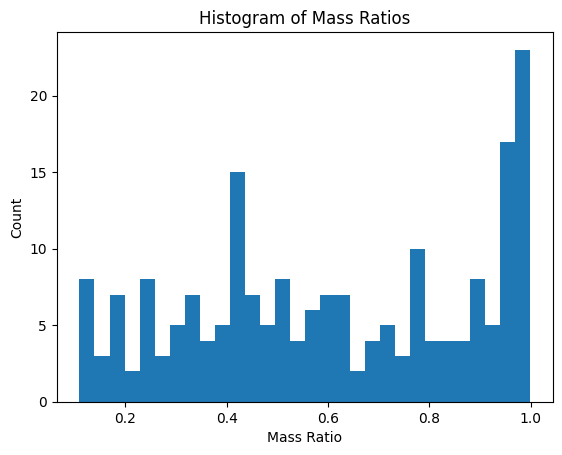

In [20]:
star_ratio = []

for mass1, mass2 in zip(data['mass_1'], data['mass_2']):
    if mass1 > mass2:
        star_ratio.append(mass2/mass1)
    else:
        star_ratio.append(mass1/mass2)

plt.hist(star_ratio, bins=30)
plt.title('Histogram of Mass Ratios')
plt.xlabel('Mass Ratio')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

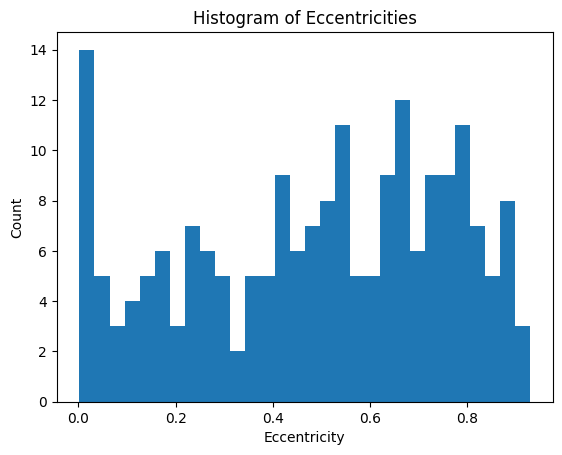

In [21]:
plt.hist(data['ecc'], bins=30)
plt.title('Histogram of Eccentricities')
plt.xlabel('Eccentricity')
plt.ylabel('Count')

Text(0, 0.5, 'Total Mass')

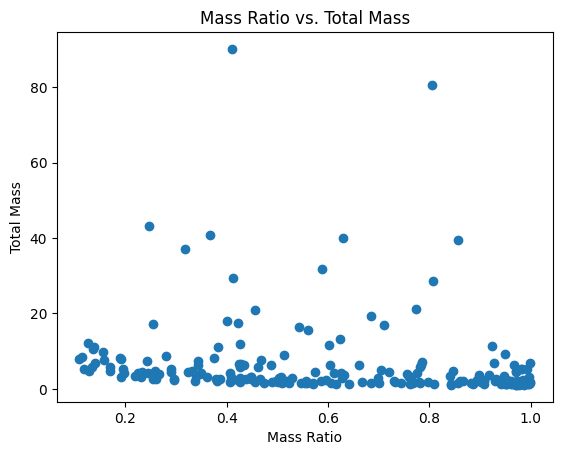

In [22]:
plt.scatter(star_ratio, data['mass_1'] + data['mass_2'])
plt.title('Mass Ratio vs. Total Mass')
plt.xlabel('Mass Ratio')
plt.ylabel('Total Mass')

### 1.3.5 Practice Problem 4: Potentially Hazardous Asteroids

In [23]:
# Running in Google Colab? Run this cell to download the file for this problem
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/PHA_data.csv

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2025-06-09 19:34:40--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/PHA_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315721 (308K) [text/plain]
Saving to: ‘PHA_data.csv’

PHA_data.csv        100%[===================>] 308.32K  --.-KB/s    in 0.004s  

2025-06-09 19:34:40 (80.5 MB/s) - ‘PHA_data.csv’ saved [315721/315721]



In this problem, you will look at a dataset describing Potentially Hazardous Asteroids (PHAs) which are cataloged by the Minor Planets Center, hosted at the Harvard-Smithsonian Center for Astrophysics. You will find out why these are called Potentially Hazardous.

The original version of this data can be found [here](https://www.minorplanetcenter.net/data). The version supplied here has been reformatted for easier reading by `pd.read_csv()`. Note that the Center updates this data frequently, so the version here, made in early 2023, may be wildly inaccurate.

The first thing to do is to open the file and look at the contents. Notice that the first line of the file contains a description of the columns. Therefore, it would be a good idea to use the keyword argument `header=0`. Similarly, the first column of data is an index, so you should use the keyword argument `index_col=0`. Finally, the last column contains a bunch of dates. In order to make sure pandas parses this data correctly, we can use the keyword argument `parse_dates=['Date of last observation']`. In the cell below, put this all together and read the file using `pd.read_csv()`. Print the dataframe and inspect it to make sure nothing is out of the ordinary. Report the total number of rows.

In [24]:
data_filename = 'PHA_data.csv'
data = pd.read_csv(data_filename)

print(data)

      Unnamed: 0 Designation  Abs Mag  Slope Param  Epoch  Mean anom (deg)  \
0              0       01566    16.50         0.15  K232P        352.54819   
1              1       01620    15.32         0.15  K232P        224.05341   
2              2       01862    16.11         0.09  K232P        281.24750   
3              3       01981    15.28         0.15  K232P          9.03147   
4              4       02101    18.72         0.15  K232P          0.32752   
...          ...         ...      ...          ...    ...              ...   
2325        2325       z4433    20.58         0.15  K232P        134.23024   
2326        2326       z4470    18.39         0.15  K232P        256.53119   
2327        2327       z8350    19.96         0.15  K232P        312.19876   
2328        2328       z9106    20.11         0.15  K232P        110.97642   
2329        2329       z9920    19.74         0.15  K232P        304.12567   

      Argument of Perihelion (deg)  Longitude of Ascending Node

Next, make two histograms, one for the pericenter and one for the apocenter of each object. Add additional lines using `plt.axvline()` representing the semimajor axis of the inner planets. Optionally, also add dashed lines around these solid lines corresponding to the pericenter and apocenter of the inner planets and Jupiter. If you can, add shading to the region in between the dashed lines using `plt.axvspan`.

The documentation of `plt.axvline()` can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html#matplotlib.pyplot.axvline). The documentation of `plt.axvspan()` can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html). Here's an example for how you'd do this for Mars. Note I am shading the region but without the dashed lines for the pericenter and apocenter. When doing this for multiple planets, it would be easier to do so with a for loop.
```
Mars_SMA = 1.524 # AU
Mars_ecc = 0.0934

Mars_peri = Mars_SMA*(1 - Mars_ecc)
Mars_apo = Mars_SMA*(1 + Mars_ecc)

plt.axvline(x = Mars_SMA, color='g')
plt.axvspan(Mars_peri, Mars_apo, facecolor='g', alpha=0.5)
```

Do you notice anything potentially alarming? In order to make this a more quantitative claim, how many objects in the dataset have a pericenter smaller than Earth's semimajor axis AND an apocenter larger than Earth's semimajor axis? Repeat this for each of the inner planets and Jupiter.

You should notice that some of these objects do not seem to have Earth-crossing orbits. Why do you think they're on this list?

In [28]:
for row in data:
    pericenter = data['Semimajor Axis (AU)'] * (1 - data['Eccentricity'])
    apocenter = data['Semimajor Axis (AU)'] * (1 + data['Eccentricity'])

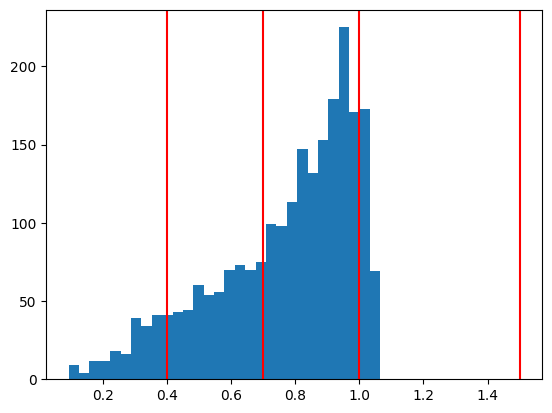

In [40]:
plt.hist(pericenter, bins=30)

for distance in df['Distance'][0:4]:
    plt.axvline(x = distance, linestyle="-", color='r')

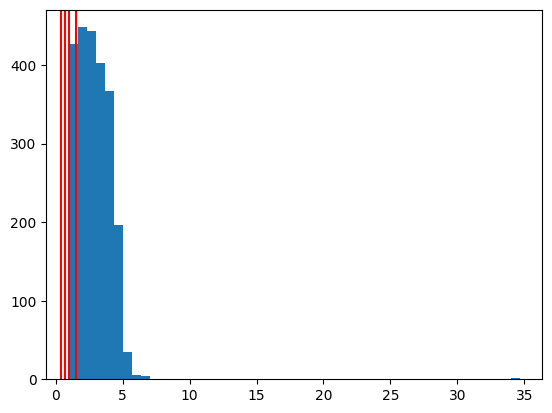

In [41]:
plt.hist(apocenter, bins=50)

for distance in df['Distance'][0:4]:
    plt.axvline(x = distance, linestyle="-", color='r')

Make an additional histogram showing the dates of last observation. Since this is datetime data, which pandas handles internally quite efficiently, you can use the method `df['Date of Last Observation'].hist()` to do this quickly. Look at the range on the x-axis. Is this concerning?


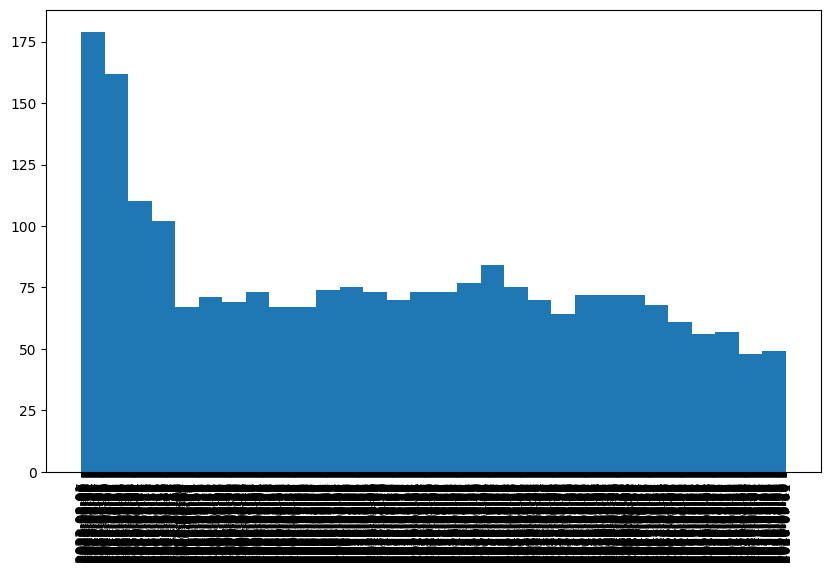

In [55]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(data['Date of last observation'], bins=30)

plt.xticks(rotation=90)

plt.show()

***Optional***

We can make a better version of the first two histograms in a way that's visually more intuitive. For the purposes of the code below, I'll assume you named your Dataframe `df`.

First, let's reorder the rows to sort by pericenter and apocenter values in ascending order.
```
df = df.sort_values(by=['peri', 'apo'])
```
Next, since the dataset is so large, let's select only a subset of the rows to visualize. However, we still want to show the whole extent of the dataset, so choosing the first chunk of the data would not be a good option. Instead, let's choose every nth row. For this case, I'll use `n=40`, though you should feel free to play around with this number. I will make this a variable so it is easy to change later.
```
nth_row = 40
df_reduced = df.iloc[::nth_row, :]
```
One more step. In order to make our plot look nice, let's also reset the index. Optionally, you can add the keyword argument `drop=True`. If you don't (I will not), then your new dataframe will add the old indices as a new column.
```
df_reduced = df_reduced.reset_index()
```
Now, we can get to plotting. What we will do is use the index value as the y-value so that each object gets its own line. For the x-values, we will use the semimajor axis. We will also include the extent of the orbit by plotting the pericenter and apocenter using errorbar.
```
xdata = df_reduced['Semimajor Axis (AU)'].values
ydata = df_reduced.index
xerr_low = xdata - df_reduced['peri'].values
xerr_high = df_reduced['apo'].values - xdata
xerr = (xerr_low, xerr_high)
plt.errorbar(xdata, ydata, xerr = xerr, linestyle='')
```
As before, also added some vertical lines and shaded regions representing the inner planets.